#PREDICTION USING UNSUPERVISED ML
OBJECTIVE


> *From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually.*







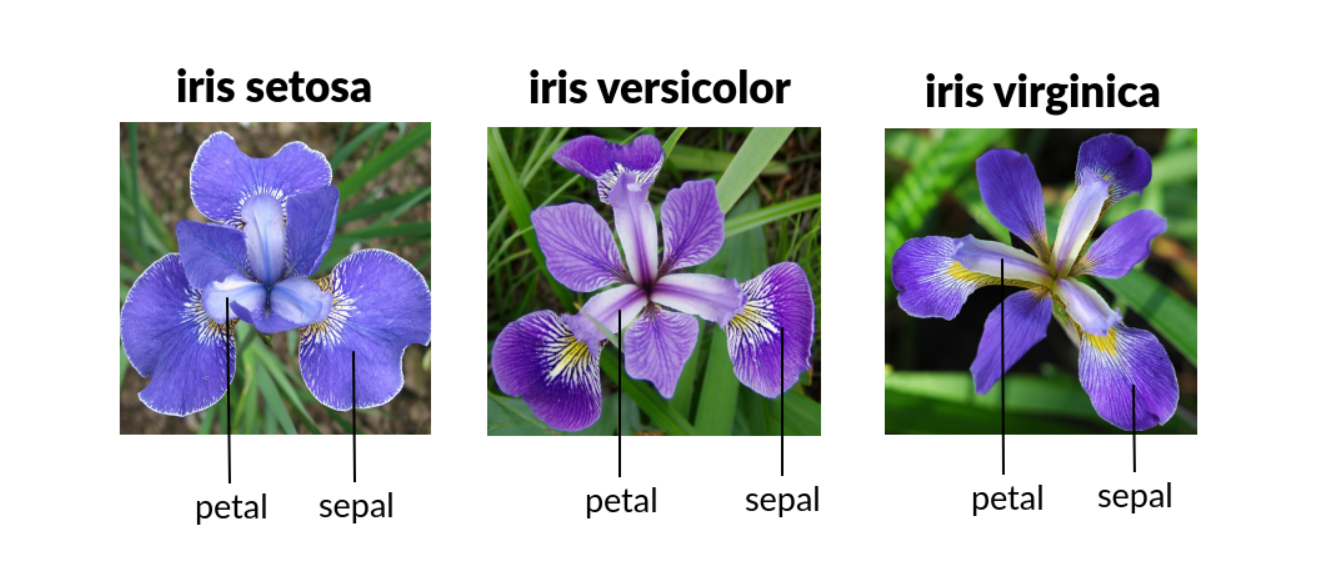

K-MEANS CLUSTERING

> *K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.*














HOW DOES K-MEANS CLUSTERING WORK?

1.   *Select the k values.*
2.   *Initialize the centroids.*
3.   *Select the group and find the average.* 

---

 
 Author ~ *Aswathy Chandrasekar*
 
 ---

###- *Importing Libraries*

In [ ]:
# Importing the libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings as wg
wg.filterwarnings("ignore")

### - *Load & Summarize Dataset*

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [ ]:
## Loading dataset
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Dropping the Id column
df.drop(['Id'], axis=1, inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### - *Basic Exploratory Data Analysis (EDA)*




In [ ]:
#returns the total number of rows and columns
df.shape

(150, 5)

In [ ]:
# returns the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#returns the statistical info.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
#Checks for null values if any
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Checks for duplicates values if any
df.duplicated().sum()

3

In [ ]:
#Dropping the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#returns the total number of rows and columns
df.shape

(147, 5)

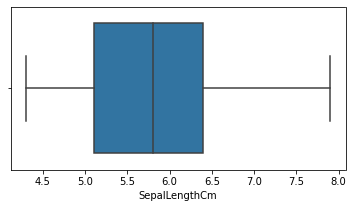

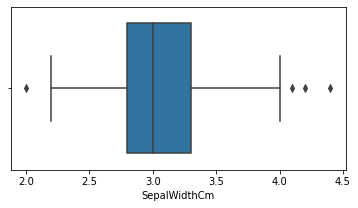

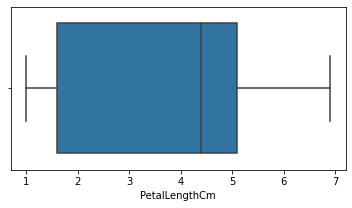

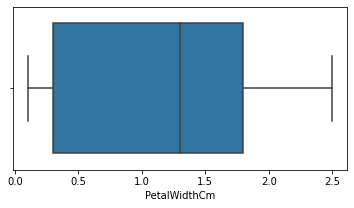

In [ ]:
#Checking for any outliers if any
for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])
        plt.show()

*We can find outliers in the SepalwidthCm column. We need to remove the outliers.*

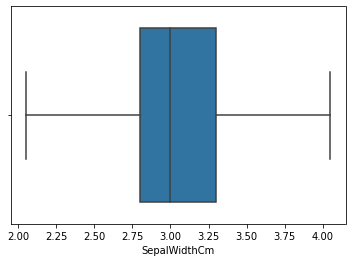

In [ ]:
#Treating outliers present in the SepalwidthCm column
q1,q3=np.percentile(df['SepalWidthCm'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
sns.boxplot(df['SepalWidthCm'])

### *- Understanding the data*

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


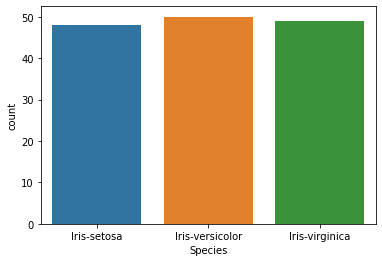

In [ ]:
#Frequency distribution of species
print(df.Species.value_counts())
sns.countplot(df.Species)

In [ ]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


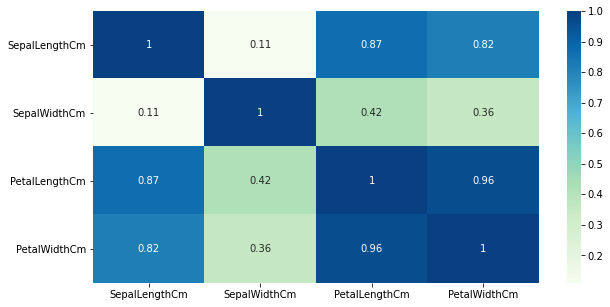

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(df.corr()), cmap='GnBu', annot=True)

*Data Insights-*


*   *Sepal Length and Sepal Width features are slightly correlated with each other.*








### *- Determing The Optimum Number Of Clusters Using The Elbow Method*

ELBOW METHOD

> *In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.*







In [ ]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

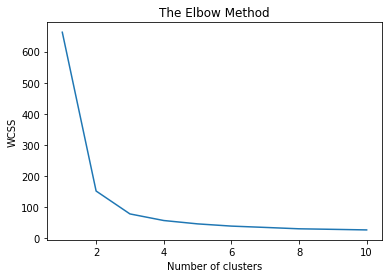

In [ ]:
# Plotting the solution on the line graph which will help us observe "The elbow"
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

*You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.*

*In conclusion Optimum number of clusters is* ***3*** 

### *- Implementing K-Means Clustering*

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### *- Plotting Clusters*

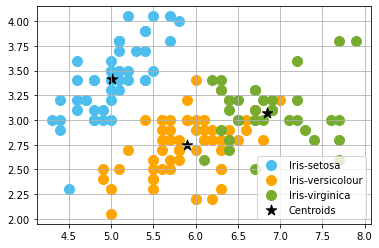

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = '#4DBEEE', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = '#77AC30', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 120, c = 'black', marker='*', label = 'Centroids')

plt.grid()
plt.legend()

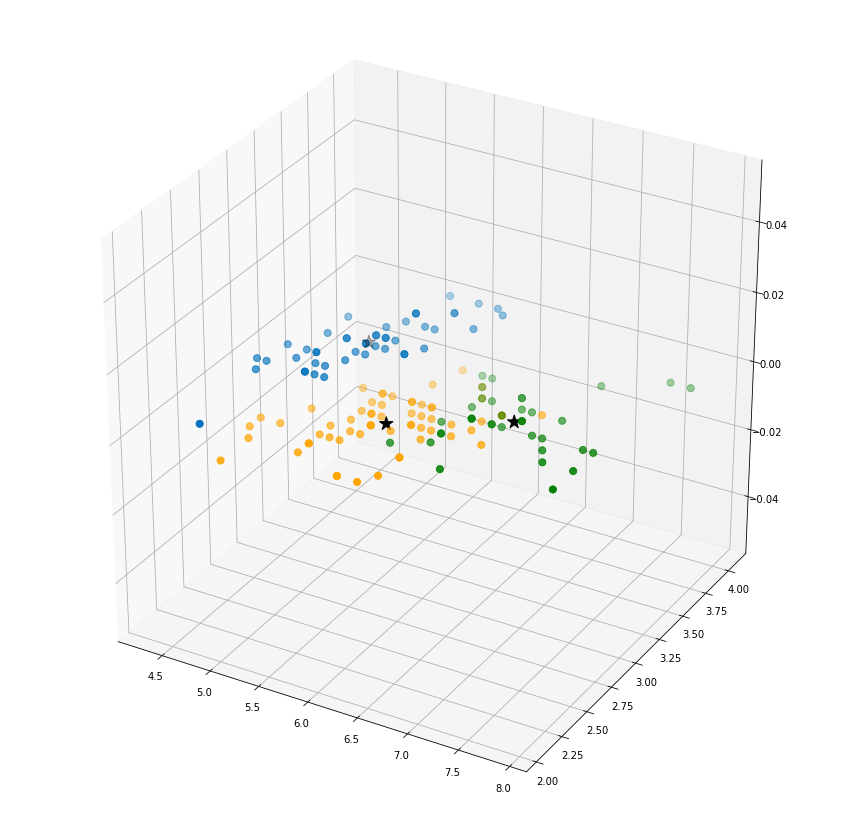

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = '#0072BD', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200,  c = 'black', marker='*', label = 'Centroids')
plt.show()

### *- Labelling Predictions*

In [ ]:
#considering, 
#0 corresponds to 'Iris-setosa'
#1 corresponds to 'Iris-versicolour'
#2 corresponds to 'Iris-verginica'

y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

### *- Adding the prediction to the dataset*

In [ ]:
data_with_clusters = df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   SepalLengthCm  SepalWidthCm  ...      Species      Cluster
0            5.1           3.5  ...  Iris-setosa  Iris-setosa
1            4.9           3.0  ...  Iris-setosa  Iris-setosa
2            4.7           3.2  ...  Iris-setosa  Iris-setosa
3            4.6           3.1  ...  Iris-setosa  Iris-setosa
4            5.0           3.6  ...  Iris-setosa  Iris-setosa

[5 rows x 6 columns]


### *- Data Visualization*

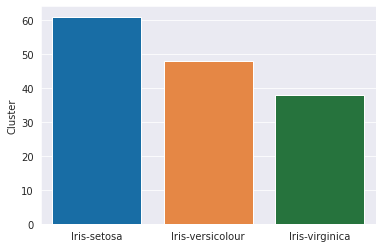

In [ ]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette([	'#0072BD', '#ff832b', '#198038']));

*Bar Plot Inference* - 
*   *There are around 62 Iris-setosa*
*   *48 iris-versicolour and*
*   *Roughly 38 Iris-virginica*








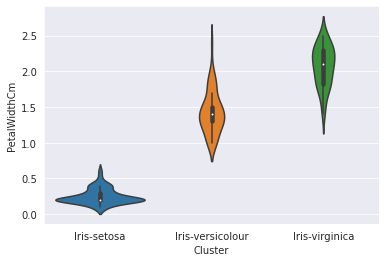

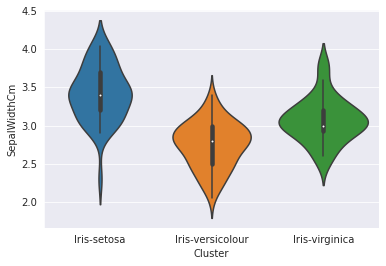

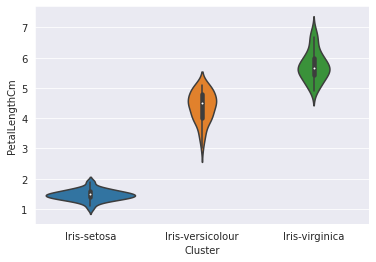

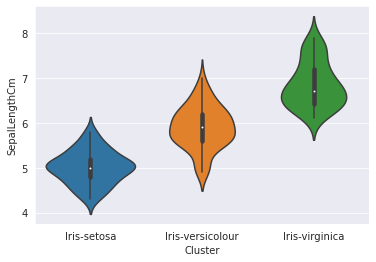

In [ ]:
#Violin Plot
sns.violinplot(x="Cluster",y="PetalWidthCm",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="SepalWidthCm",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="PetalLengthCm",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="SepalLengthCm",data=data_with_clusters)
plt.show()

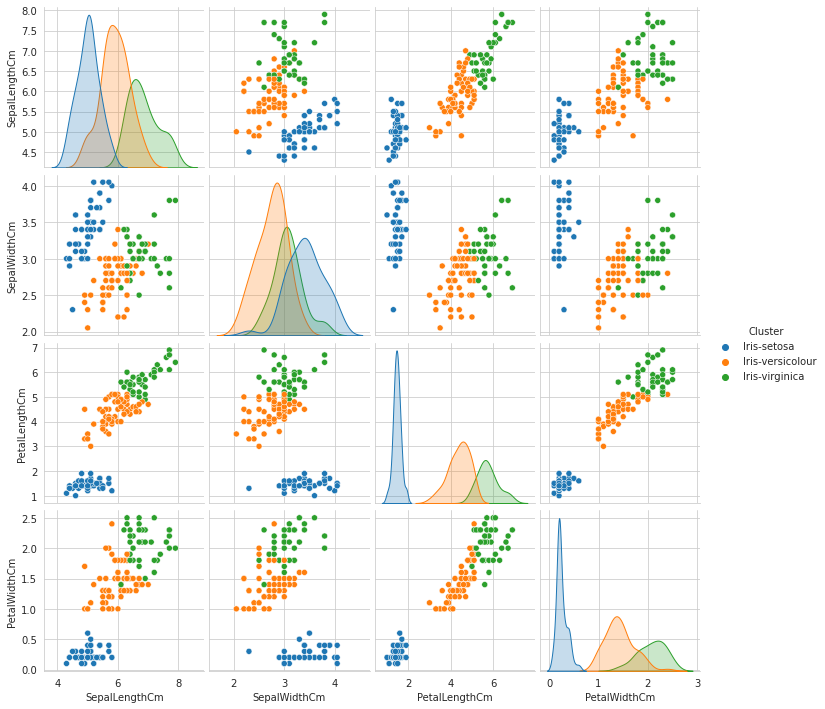

In [ ]:
#Pairplot
sns.set_style('whitegrid')  ### Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster');

*Pairplot insights -*
*   *High correlation between petal length and width columns.*
*   *Setosa has both low petal length and width.*
*   *Versicolor has both average petal length and width.*
*   *Virginica has both high petal length and width.*
*   *Sepal width for setosa is high and length is low.*
*   *Versicolor have average values for for sepal dimensions.*
*   *Virginica has small width but large sepal length.*








